## Read data

In [1]:
from math import*
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
data=pd.read_csv('StudentsPerformance.csv')
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some high school,free/reduced,none,0,17,10
1,female,group B,high school,free/reduced,none,8,24,23
2,female,group B,some high school,free/reduced,none,18,32,28
3,female,group B,some college,standard,none,11,38,32
4,female,group C,some college,free/reduced,none,22,39,33
...,...,...,...,...,...,...,...,...
995,male,group E,some college,standard,completed,99,87,81
996,male,group A,some college,standard,completed,100,96,86
997,male,group D,some college,standard,completed,100,97,99
998,male,group E,associate's degree,free/reduced,completed,100,100,93


In [2]:
  # no null values

In [3]:
data.info()              

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


## 1. No. of males and females participated

In [4]:
data['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

## 2. Parental level of education

In [5]:
data['parental level of education'].unique()

array(['some high school', 'high school', 'some college',
       "associate's degree", "bachelor's degree", "master's degree"],
      dtype=object)

In [6]:
data.groupby('parental level of education').mean()

,math score,reading score,writing score
parental level of education,,,
associate's degree,67.977477,71.018018,70.031532
bachelor's degree,69.288136,73.000000,73.381356
high school,61.821429,64.602041,62.403061
master's degree,70.254237,75.949153,75.677966
some college,67.128319,69.566372,69.035398
some high school,63.134078,66.759777,64.888268


In [7]:
data.groupby('parental level of education')[['math score','reading score','writing score']].mean().max()

math score       70.254237
reading score    75.949153
writing score    75.677966
dtype: float64

## Insight  :

### The students with parent's education level as master's level  has the highest average scores in math, reading and writing

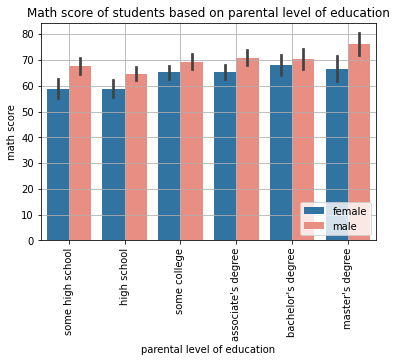

In [8]:
sns.barplot(x='parental level of education',y='math score',data=data,hue='gender',palette=['C0','salmon'])
plt.legend(loc='lower right')
plt.xticks(rotation=90)
plt.title('Math score of students based on parental level of education')
plt.grid()
plt.show()

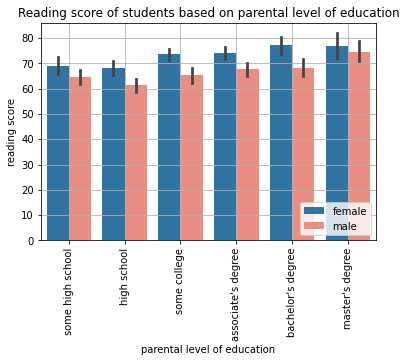

In [9]:
sns.barplot(x='parental level of education',y='reading score',data=data,hue='gender',palette=['C0','salmon'])
plt.legend(loc='lower right')
plt.xticks(rotation=90)
plt.title('Reading score of students based on parental level of education')
plt.grid()
plt.show()

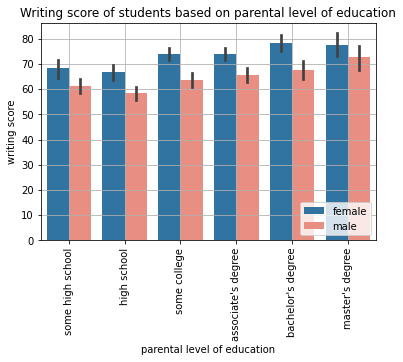

In [10]:
sns.barplot(x='parental level of education',y='writing score',data=data,hue='gender',palette=['C0','salmon'])
plt.legend(loc='lower right')
plt.xticks(rotation=90)
plt.title('Writing score of students based on parental level of education')
plt.grid()
plt.show()

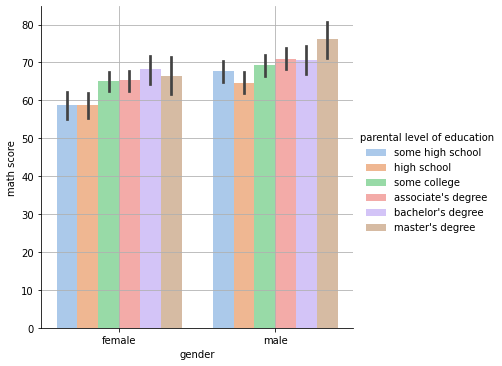

In [11]:
sns.catplot(x='gender',y='math score',hue='parental level of education',kind='bar',data=data,palette='pastel')
plt.grid()
plt.show()

## Insight :

### Male students with parent's of master's level of education scores the highest in math

## 3. Highest scores on average

## a. Based on gender

In [12]:
data.groupby('gender').mean()

,math score,reading score,writing score
gender,,,
female,63.376448,72.590734,72.467181
male,68.821577,65.545643,63.446058


In [13]:
data.groupby('gender').mean().max()

math score       68.821577
reading score    72.590734
writing score    72.467181
dtype: float64

### Females scores the highest

## b. Based on test preparation course

In [14]:
data.groupby('test preparation course').mean()

,math score,reading score,writing score
test preparation course,,,
completed,69.96648,74.175978,74.684358
none,63.78972,66.417445,64.457944


In [15]:
data.groupby('test preparation course').mean().max()

math score       69.966480
reading score    74.175978
writing score    74.684358
dtype: float64

### Those who completed the course is found to score the highest on average

## 4. Scoring variation

## a. Based on gender

In [16]:
data.groupby('gender').var()

,math score,reading score,writing score
gender,,,
female,256.958593,207.677438,220.369327
male,211.889097,200.211010,202.413924


### The scoring variation is high among females

## b. Based on test preparation course

In [17]:
data.groupby('test preparation course').var()

,math score,reading score,writing score
test preparation course,,,
completed,210.884027,183.265864,175.202612
none,246.668662,213.419851,226.251739


### The variation is high among those who haven't completed the course

## 5. Bonus to top 25% based on their math scores

In [18]:
# Third quartile Q3

In [19]:
third_quartile=data['math score'].quantile(0.75)     
third_quartile                                           

77.0

<AxesSubplot:xlabel='gender', ylabel='math score'>

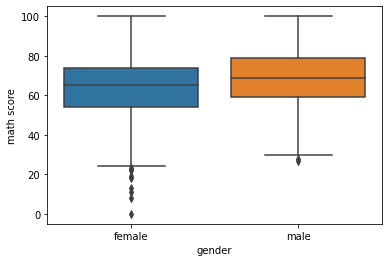

In [20]:
sns.boxplot(x='gender',y='math score',data=data)

In [21]:
data['math score'].describe()          # statistical measures

count    1000.000000
mean       66.001000
std        15.569567
min         0.000000
25%        57.000000
50%        66.000000
75%        77.000000
max       100.000000
Name: math score, dtype: float64

In [22]:
df=pd.DataFrame(data['math score'])

In [23]:
eligible=df>=third_quartile
eligible

,math score
0,False
1,False
2,False
3,False
4,False
...,...
995,True
996,True
997,True
998,True


### Indices of top 25% students who has high math scores 

In [24]:
np.where(eligible)[0]             

array([414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426,
       427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439,
       440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452,
       453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465,
       466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478,
       479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491,
       492, 493, 494, 495, 496, 497, 498, 499, 500, 501, 502, 503, 504,
       505, 506, 507, 508, 509, 510, 511, 512, 513, 514, 515, 516, 517,
       849, 850, 851, 852, 853, 854, 855, 856, 857, 858, 859, 860, 861,
       862, 863, 864, 865, 866, 867, 868, 869, 870, 871, 872, 873, 874,
       875, 876, 877, 878, 879, 880, 881, 882, 883, 884, 885, 886, 887,
       888, 889, 890, 891, 892, 893, 894, 895, 896, 897, 898, 899, 900,
       901, 902, 903, 904, 905, 906, 907, 908, 909, 910, 911, 912, 913,
       914, 915, 916, 917, 918, 919, 920, 921, 922, 923, 924, 92